# □ Installation

###Before installing, please download Rtools (https://cran.r-project.org/bin/windows/Rtools)

In [ ]:
if(!require(remotes)) install.packages("remotes")
remotes::install_github("agronomy4future/fwrmodel")

library(remotes)
library(fwrmodel)


# □ Code practice

## ■ data upload

In [ ]:
if(!require(readr)) install.packages("readr")
library(readr)
github="https://raw.githubusercontent.com/agronomy4future/raw_data_practice/main/fwrm_package_data_practice.csv"
df= data.frame(read_csv(url(github), show_col_types=FALSE))

In [ ]:
set.seed(100)
df[sample(nrow(df),5),]

,year,variety,nitrogen,location,AGW,KN,GY
,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
202,2023,cv2,N0,Nebraska,318.6,3764,11864.8
112,2024,cv2,N1,Iowa,313.6,4570,14177.8
206,2023,cv2,N0,Nebraska,338.9,3764,12619.8
4,2023,cv1,N1,Iowa,311.7,3476,10721.4
98,2024,cv1,N1,Iowa,263.9,5618,14669.2


## ■ to calculate environmental index

In [ ]:
if(!require(dplyr)) install.packages("dplyr")
library(dplyr)

stability= fwrmodel(df, env_cols = c("year", "nitrogen", "location"),
                    genotype_col= "variety", yield_cols= c("AGW","GY","KN"))

In [ ]:
env_index_cal= data.frame(stability$env_index)

In [ ]:
set.seed(100)
env_index_cal[sample(nrow(env_index_cal),5),]

,variety,year,nitrogen,location,Environments,Env_index_AGW,AGW,Env_index_GY,GY,Env_index_KN,KN
,<fct>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
20170,cv2,2023,N0,Nebraska,2023_N0_Nebraska,3.443333,318.6,-435.7763,11810.8,-214.5600,3488
16887,cv1,2023,N0,Illinois,2023_N0_Illinois,-1.523333,307.0,-2300.4197,8130.4,-786.9267,2742
3430,cv2,2023,N1,Iowa,2023_N1_Iowa,-22.023333,337.4,-202.7063,11931.9,195.4400,3721
3696,cv2,2023,N1,Iowa,2023_N1_Iowa,-22.023333,289.0,-202.7063,10474.6,195.4400,3411
20474,cv2,2023,N0,Nebraska,2023_N0_Nebraska,3.443333,348.8,-435.7763,10947.9,-214.5600,3672


## ■ to obtain stability (slope)

In [ ]:
coefficient_AGW= as.data.frame(stability$regression$AGW)
coefficient_KN= as.data.frame(stability$regression$KN)
coefficient_GY= as.data.frame(stability$regression$GY)

In [ ]:
print(coefficient_AGW)

  variety          term    estimate  std.error  statistic       p.value
1     cv1   (Intercept) 297.9520000 3.95194803  75.393704  1.368777e-88
2     cv1 Env_index_AGW   0.7523172 0.14292608   5.263681  8.336224e-07
3     cv2   (Intercept) 318.8220000 2.58702388 123.238909 2.795793e-109
4     cv2 Env_index_AGW   0.8862399 0.09356226   9.472194  1.693111e-15
5     cv3   (Intercept) 312.6860000 2.64794053 118.086489 1.787034e-107
6     cv3 Env_index_AGW   1.3614429 0.09576537  14.216443  1.487695e-25


In [ ]:
print(coefficient_KN)

  variety         term    estimate   std.error statistic       p.value
1     cv1  (Intercept) 3886.440000 54.15190342  71.76922  1.571373e-86
2     cv1 Env_index_KN    1.252482  0.09129200  13.71952  1.532468e-24
3     cv2  (Intercept) 3847.780000 38.71344953  99.39130 3.366570e-100
4     cv2 Env_index_KN    0.670105  0.06526508  10.26744  3.182503e-17
5     cv3  (Intercept) 3949.160000 47.92702650  82.39944  2.587083e-92
6     cv3 Env_index_KN    1.077413  0.08079779  13.33468  9.507932e-24


In [ ]:
print(coefficient_GY)

  variety         term     estimate    std.error statistic      p.value
1     cv1  (Intercept) 1.127686e+04 199.43229504 56.544789 1.272863e-76
2     cv1 Env_index_GY 1.180212e+00   0.14100362  8.370084 4.091457e-13
3     cv2  (Intercept) 1.206273e+04 132.41036300 91.101072 1.565612e-96
4     cv2 Env_index_GY 8.079266e-01   0.09361744  8.630086 1.127478e-13
5     cv3  (Intercept) 1.199685e+04 133.07776819 90.149137 4.330441e-96
6     cv3 Env_index_GY 1.011861e+00   0.09408931 10.754264 2.812580e-18


# □ to visualize data (grain weight)

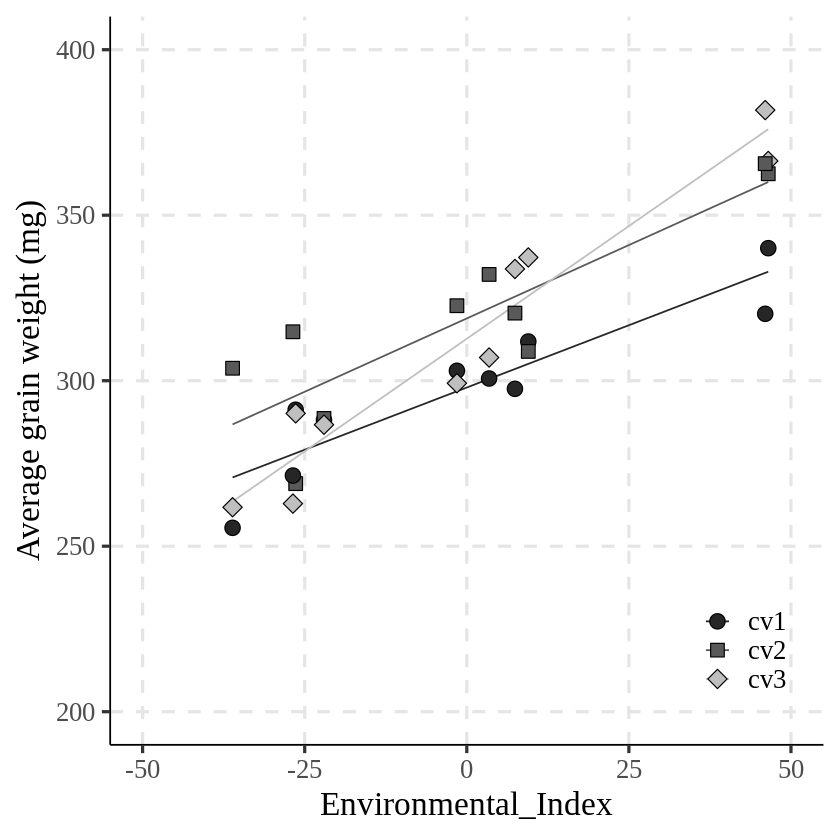

In [ ]:
if(!require(ggplot2)) install.packages("ggplot2")
library(ggplot2)

data_summary = data.frame(env_index_cal %>%
                           group_by(Environments, variety) %>%
                           dplyr::summarize(across(c(AGW, Env_index_AGW),
                                                   .fns = list(Mean = mean,
                                                               n = length)),
                           .groups = "drop"))

ggplot(data=data_summary, aes(x=Env_index_AGW_Mean, y=AGW_Mean))+
  geom_smooth(aes(group=variety, color=variety), method='lm', linetype=1, se=FALSE,
              formula=y~x, linewidth=0.5)+
  geom_point(aes(fill=variety, shape=variety), color="black", size=4)+
  scale_color_manual(values=c("grey15","grey35","grey75"))+
  scale_fill_manual(values=c("grey15","grey35","grey75"))+
  scale_shape_manual(values=c(21,22,23))+
  scale_x_continuous(breaks=seq(-50,50,25), limits=c(-50,50))+
  scale_y_continuous(breaks=seq(200,400,50), limits=c(200,400))+
  labs(x="Environmental_Index", y="Average grain weight (mg)") +
  theme_classic(base_size=20, base_family="serif")+
  theme(legend.position=c(0.89,0.13),
        legend.title=element_blank(),
        legend.key=element_rect(color=alpha("white",.001),
                                fill=alpha("white",.001)),
        legend.background=element_rect(fill=alpha("white",.001)),
        panel.grid.major= element_line(color="grey90", linetype="dashed"),
        axis.line=element_line(linewidth=0.5, colour="black"))